In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from scipy import stats
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns

<h1>Dataframe preparations</h1>

In [160]:
merged_df = pd.read_csv('/Users/rgu/Desktop/UROPs/UROP4/repo/dataframes/final505.csv')

<h1>Clustering</h1>

In [150]:
#Determine the colors of the points
colormap = {'blues': 'blue', 
          'classical': 'brown', 
          'country': 'orange', 
          'disco': 'purple', 
          'hiphop': 'skyblue', 
          'jazz': 'khaki', 
          'metal': 'black', 
          'pop': 'deeppink', 
          'reggae': 'green', 
          'rock': 'red'}

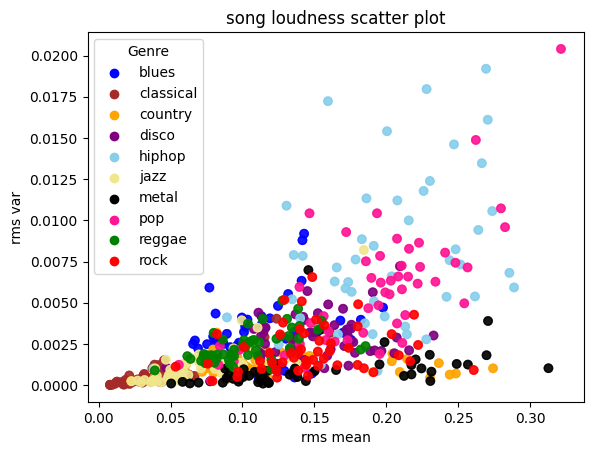

In [151]:
#plot the songs by RMS amplitude mean and variance as the axes. The points will be color coded by genre
x = merged_df['rms_mean']
y = merged_df['rms_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('rms mean')
plt.ylabel('rms var')
plt.title('song loudness scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre")

plt.show()


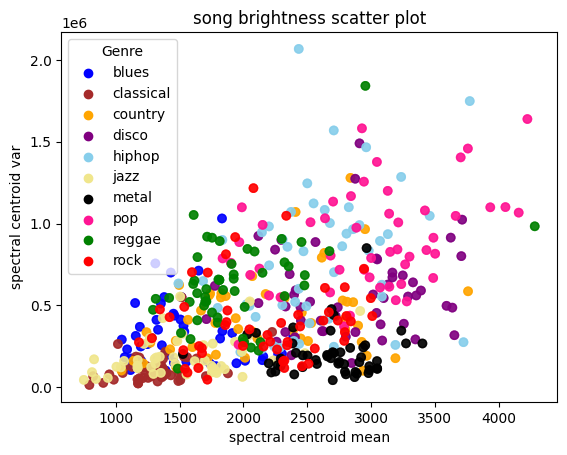

In [152]:
#plot the songs by spectral centroid mean and variance as the axes. The points will be color coded by genre
x = merged_df['spectral_centroid_mean']
y = merged_df['spectral_centroid_var']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('spectral centroid mean')
plt.ylabel('spectral centroid var')
plt.title('song brightness scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre")

plt.show()

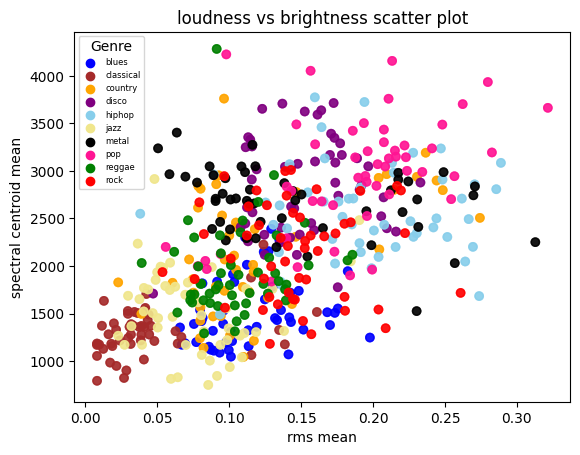

In [153]:
#plot the songs by RMS amplitude mean and spectral centroid as the axes. The points will be color coded by genre
x = merged_df['rms_mean']
y = merged_df['spectral_centroid_mean']
colors = merged_df['genre'].map(colormap)

plt.scatter(x, y, c=colors, alpha=0.7)  

plt.xlabel('rms mean')
plt.ylabel('spectral centroid mean')
plt.title('loudness vs brightness scatter plot')


for genre, color in colormap.items():
    plt.scatter([], [], c=color, label=genre)
plt.legend(title="Genre", fontsize="6")

plt.show()

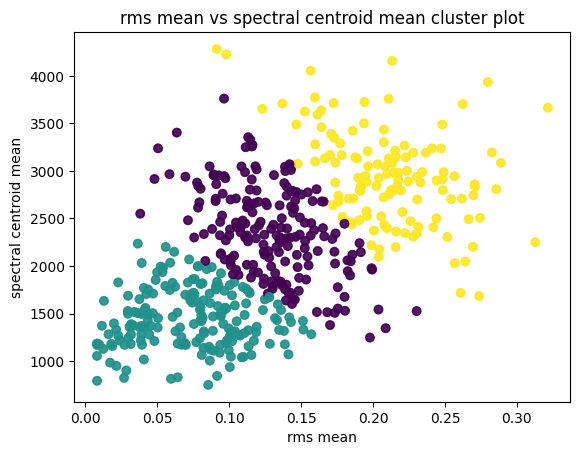

In [159]:
#Cluster plot: rms amplitude mean vs spectral centroid mean

features = merged_df[['rms_mean', 'spectral_centroid_mean']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_features)

plt.scatter(merged_df['rms_mean'], merged_df['spectral_centroid_mean'], c=clusters, cmap='viridis', alpha=0.7) #viridis is a type of colormap

plt.xlabel('rms mean')
plt.ylabel('spectral centroid mean')
plt.title("rms mean vs spectral centroid mean cluster plot")

plt.show()

<h1>Assumptions Testing</h1>

In [171]:
#sample ANOVA to test normality amongst residuals
model_test = ols('total_water_loss ~ C(song_name)', data=merged_df).fit()

anova_results_total = sm.stats.anova_lm(model_test, typ=2)
print(anova_results_total)

                sum_sq     df         F        PR(>F)
C(song_name)  0.030479  504.0  2.783214  1.095709e-29
Residual      0.010973  505.0       NaN           NaN


In [172]:
#Shapiro-Wilk Test to check for normality
residuals = model_test.resid

stat, p_value = stats.shapiro(residuals)

print(stat, p_value)

if p_value > 0.05:
    print("The data is normally distributed (fail to reject H₀).")
else:
    print("The data is not normally distributed (reject H₀).")

0.997430944983461 0.11160260775249808
The data is normally distributed (fail to reject H₀).


<h1>Pearson's Correlation</h1>

In [18]:

corr_matrix = merged_df[['rms_mean', 'rms_var', 
                  'spectral_centroid_mean', 'spectral_centroid_var', 
                  'spectral_bandwidth_mean', 'spectral_bandwidth_var',
                  'zero_crossing_rate_mean', 'zero_crossing_rate_var',
                  'chroma_stft_mean', 'chroma_stft_var',
                  'rolloff_mean', 'rolloff_var',
                  'harmony_mean', 'harmony_var',
                  'perceptr_mean', 'perceptr_var', 'tempo', 'total_water_loss']].corr()

print(corr_matrix)

                         rms_mean   rms_var  spectral_centroid_mean  \
rms_mean                 1.000000  0.583198                0.552058   
rms_var                  0.583198  1.000000                0.301862   
spectral_centroid_mean   0.552058  0.301862                1.000000   
spectral_centroid_var    0.325072  0.541582                0.491780   
spectral_bandwidth_mean  0.580453  0.363501                0.910631   
spectral_bandwidth_var   0.117950  0.344964                0.008956   
zero_crossing_rate_mean  0.384744  0.126297                0.892743   
zero_crossing_rate_var   0.335143  0.518127                0.655498   
chroma_stft_mean         0.521795  0.218438                0.667849   
chroma_stft_var         -0.151618  0.276765               -0.344267   
rolloff_mean             0.582352  0.333787                0.981433   
rolloff_var              0.198077  0.391240                0.148172   
harmony_mean             0.022355  0.075353                0.015937   
harmon

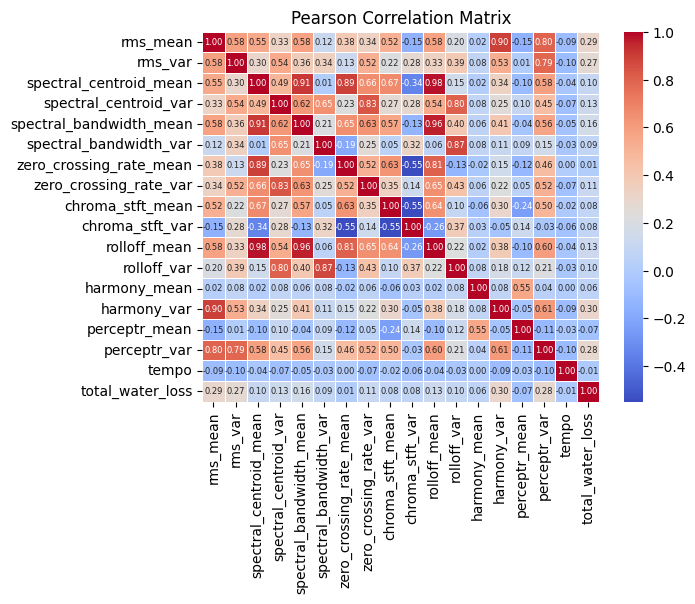

In [22]:
#Visualize the Pearson's Correlation Matrix
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, annot_kws={"size": 6})
plt.title('Pearson Correlation Matrix')
plt.show()

In [38]:
from scipy.stats import pearsonr


#calculate pearson correlation coefficient and p-value
for column in merged_df.columns[10:]:
    r, p_value = pearsonr(merged_df[column], merged_df['total_water_loss'])
    
    print(f"Variable: {column}")
    print(f"Pearson's correlation coefficient: {r}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")
    print('---------------------')


Variable: rms_mean
Pearson's correlation coefficient: 0.29295437530967094
P-value: 1.2340478674092346e-21
The correlation is statistically significant.
---------------------
Variable: rms_var
Pearson's correlation coefficient: 0.27097064059687476
P-value: 1.2647773986476343e-18
The correlation is statistically significant.
---------------------
Variable: spectral_centroid_mean
Pearson's correlation coefficient: 0.10275593438777927
P-value: 0.0010146234443675882
The correlation is statistically significant.
---------------------
Variable: spectral_centroid_var
Pearson's correlation coefficient: 0.13423594262420618
P-value: 1.6974018189320825e-05
The correlation is statistically significant.
---------------------
Variable: spectral_bandwidth_mean
Pearson's correlation coefficient: 0.16418477527407885
P-value: 1.341868274303395e-07
The correlation is statistically significant.
---------------------
Variable: spectral_bandwidth_var
Pearson's correlation coefficient: 0.08641131471597412
P-v

<h1>Welch's ANOVA</h1>


<h3>Independent: song_name,  Dependent: total 
water loss </h3>

In [168]:
#Independent: song_name, Dependent: total water loss
#Fit OLS model
model_total = ols('total_water_loss ~ C(song_name)', data=merged_df).fit()

#do Welch's ANOVA
anova_results_total = anova.anova_lm(model_total, typ=2, robust='welch')
print(anova_results_total)

ValueError: robust options welch not understood

<h1>TROUBLE SHOOTING</h1>
<p>currently trying to fix the normality issues within the data. testing deleting 4 outlier points</p>


In [141]:
#Homogeneity Test: Levene's Test
genres = testdata['genre'].unique()  # Get the unique genre names
groups = [testdata[testdata['genre'] == genre]['total_water_loss'] for genre in genres]
stat, p_value = stats.levene(*groups)
print("Levene's Test Statistic:", stat)
print("P-Value:", p_value)

if p_value > 0.05:
    print("Variances are equal across groups (fail to reject H₀).")
else:
    print("Variances are significantly different across groups (reject H₀).")

Levene's Test Statistic: 3.051074434020949
P-Value: 0.0013048597637726907
Variances are significantly different across groups (reject H₀).


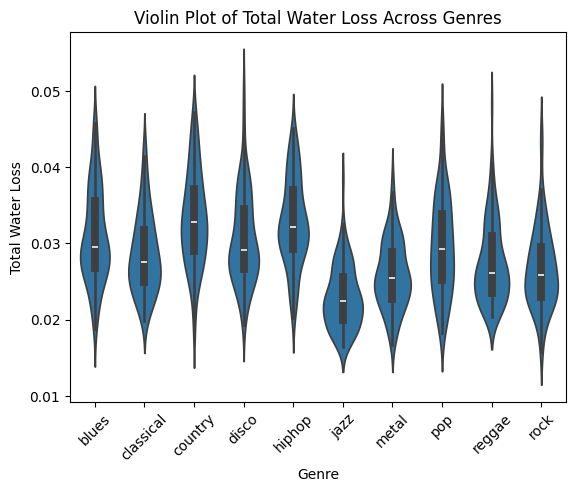

In [140]:
sns.violinplot(x='genre', y='total_water_loss', data=testdata)
plt.title('Violin Plot of Total Water Loss Across Genres')
plt.xlabel('Genre')
plt.ylabel('Total Water Loss')
plt.xticks(rotation=45)
plt.show()


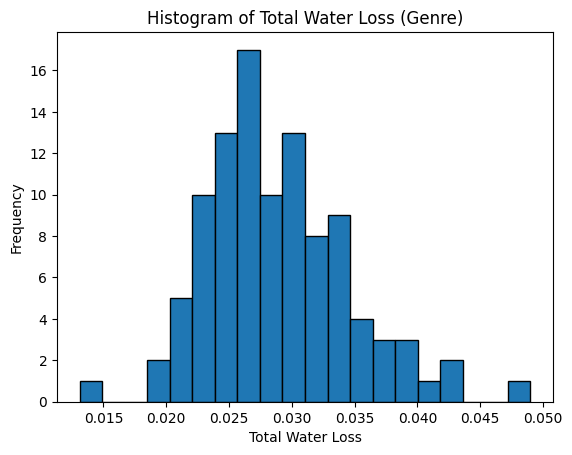

In [134]:
genredata = testdata[testdata['genre'] == 'classical']
plt.hist(genredata['total_water_loss'], bins=20, edgecolor='black')
plt.title('Histogram of Total Water Loss (Genre)')
plt.xlabel('Total Water Loss')
plt.ylabel('Frequency')
plt.show()


In [135]:
for _,row in genredata.iterrows():
    if row['total_water_loss'] > 0.045 or row['total_water_loss'] < 0.015:
        print(row[:10])

song_name           classical.00022.wav
genre                         classical
speaker_id                            1
dry_weight                       2.0414
weight0                          2.8886
weight1                          2.8677
weight2                          2.8396
water_loss1                      0.0209
water_loss2                      0.0281
total_water_loss                  0.049
Name: 144, dtype: object
song_name           classical.00041.wav
genre                         classical
speaker_id                            1
dry_weight                        1.719
weight0                          2.6332
weight1                          2.6313
weight2                          2.6201
water_loss1                      0.0019
water_loss2                      0.0112
total_water_loss                 0.0131
Name: 182, dtype: object


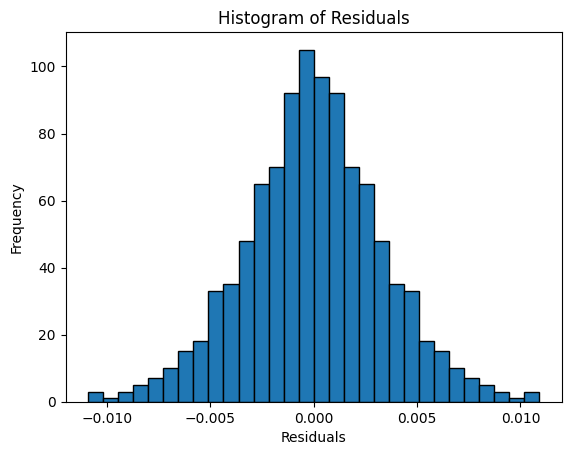

In [95]:

residuals = model_test.resid
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

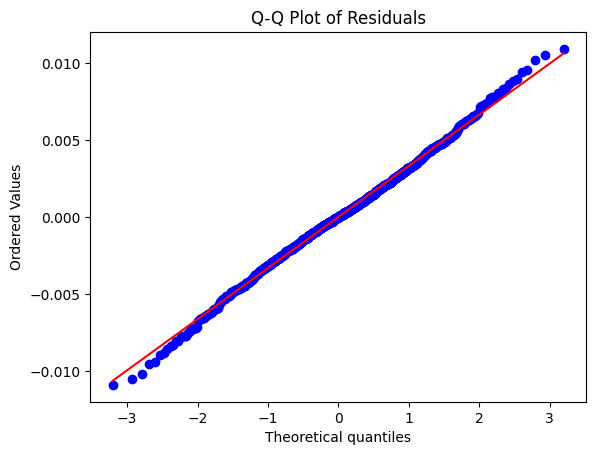

In [96]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [84]:
std_deviation = np.std(residuals)
mean_residual = np.mean(residuals)
threshold = 3  # This can be adjusted

outliers = data510[np.abs(residuals) > (mean_residual + threshold * std_deviation)]
print("Outliers:")
print(outliers)

Outliers:
             song_name    genre  speaker_id  dry_weight  weight0  weight1  \
240  country.00018.wav  country           1      1.9168   2.7812   2.7659   
241  country.00018.wav  country           2      1.8019   2.8015   2.7640   
354    disco.00024.wav    disco           1      1.8813   2.6314   2.6181   
355    disco.00024.wav    disco           2      1.7436   2.5319   2.5155   
524     jazz.00007.wav     jazz           1      1.6897   2.4121   2.4015   
525     jazz.00007.wav     jazz           2      1.7733   2.4915   2.4772   
952     rock.00017.wav     rock           1      1.5469   2.4202   2.3549   
953     rock.00017.wav     rock           2      1.5483   2.3166   2.3031   

     weight2  water_loss1  water_loss2  total_water_loss  
240   2.7531       0.0153       0.0128            0.0281  
241   2.7506       0.0375       0.0134            0.0509  
354   2.5699       0.0133       0.0482            0.0615  
355   2.5037       0.0164       0.0118            0.0282  
5

<h3>Independent: genre,  Dependent: water loss </h3>

In [9]:
#Independent: genre, Dependent: water loss for 1st minute
model1 = ols('water_loss1 ~ C(genre)', data=data510).fit()

anova_results1 = sm.stats.anova_lm(model1, typ=2)
print(anova_results1)

#Independent: genre, Dependent: water loss for 2nd minute
model2 = ols('water_loss2 ~ C(genre)', data=data510).fit()

anova_results2 = sm.stats.anova_lm(model2, typ=2)
print(anova_results2)

            sum_sq      df          F        PR(>F)
C(genre)  0.003496     9.0  17.837022  1.122905e-27
Residual  0.021996  1010.0        NaN           NaN
            sum_sq      df          F        PR(>F)
C(genre)  0.001935     9.0  12.282459  1.351586e-18
Residual  0.017678  1010.0        NaN           NaN


In [63]:
#Independent: genre, Dependent: total water loss
model_total = ols('total_water_loss ~ C(genre)', data=data510).fit()

anova_results_total = sm.stats.anova_lm(model_total, typ=2)
print(anova_results_total)

            sum_sq      df          F        PR(>F)
C(genre)  0.009971     9.0  25.317949  1.684326e-39
Residual  0.044197  1010.0        NaN           NaN


<h3>Independent: genre, Dependent: RMS amplitude</h3>

In [29]:
#One-Way ANOVA for two minutes. Independent: genre, Dependent: RMS mean
model1 = ols('rms_mean ~ C(genre)', data=merged_df).fit()

anova_results1 = sm.stats.anova_lm(model1, typ=2)
print(anova_results1)

#One-Way ANOVA for two minutes. Independent: genre, Dependent: RMS var
model2 = ols('rms_var ~ C(genre)', data=merged_df).fit()

anova_results2 = sm.stats.anova_lm(model2, typ=2)
print(anova_results2)

            sum_sq      df           F         PR(>F)
C(genre)  2.046618     9.0  109.396062  1.234829e-142
Residual  2.099490  1010.0         NaN            NaN
            sum_sq      df           F         PR(>F)
C(genre)  0.004449     9.0  104.096622  2.297469e-137
Residual  0.004796  1010.0         NaN            NaN


<h3>Independent: genre, Dependent: Spectral Centroid</h3>

In [27]:
#One-Way ANOVA for two minutes. Independent: genre, Dependent: spectral centroid mean
model1 = ols('spectral_centroid_mean ~ C(genre)', data=merged_df).fit()

anova_results1 = sm.stats.anova_lm(model1, typ=2)
print(anova_results1)

#One-Way ANOVA for two minutes. Independent: genre, Dependent: spectral centroid var
model2 = ols('spectral_centroid_var ~ C(genre)', data=merged_df).fit()

anova_results2 = sm.stats.anova_lm(model2, typ=2)
print(anova_results2)

                sum_sq      df           F         PR(>F)
C(genre)  3.167161e+08     9.0  158.421321  3.309169e-186
Residual  2.243548e+08  1010.0         NaN            NaN
                sum_sq      df           F         PR(>F)
C(genre)  6.079636e+13     9.0  111.634239  8.002271e-145
Residual  6.111658e+13  1010.0         NaN            NaN


In [40]:
for columns in merged_df.columns[10:27]:
    print(columns)
    testmodel = ols(f'{columns} ~ C(genre)', data=merged_df).fit()

    anova_results1 = sm.stats.anova_lm(testmodel, typ=2)
    print(anova_results1)
    print('-----------------------')

rms_mean
            sum_sq      df           F         PR(>F)
C(genre)  2.046618     9.0  109.396062  1.234829e-142
Residual  2.099490  1010.0         NaN            NaN
-----------------------
rms_var
            sum_sq      df           F         PR(>F)
C(genre)  0.004449     9.0  104.096622  2.297469e-137
Residual  0.004796  1010.0         NaN            NaN
-----------------------
spectral_centroid_mean
                sum_sq      df           F         PR(>F)
C(genre)  3.167161e+08     9.0  158.421321  3.309169e-186
Residual  2.243548e+08  1010.0         NaN            NaN
-----------------------
spectral_centroid_var
                sum_sq      df           F         PR(>F)
C(genre)  6.079636e+13     9.0  111.634239  8.002271e-145
Residual  6.111658e+13  1010.0         NaN            NaN
-----------------------
spectral_bandwidth_mean
                sum_sq      df           F         PR(>F)
C(genre)  1.832415e+08     9.0  187.899754  8.852459e-209
Residual  1.094401e+08  1010.0

<h1>Fisher's LSD</h1>

In [11]:
#Fisher's LSD
def fisherLSD(anova_table, n, alpha = 0.05):
    df = anova_table['df']['Residual']
    MSE = anova_table['sum_sq']['Residual']/df
    SE = (2*MSE/n) ** 0.5

    t = stats.t.ppf(1- alpha/2, df) #its like qt(0.975, df) in r

    return t*SE


In [18]:
fLSD_second_ids = fisherLSD(anova_results2, 2)
print(fLSD_second_ids) #LSD for 2nd minute of audio exposure

#with this value, compare it to the difference of two means. if the difference is greater or equal, the means are statistically different from each other. 

0.00820959841147635


In [22]:
def compare_all_difs(names, means, lsd):
    total = []
    statistically_diff = []
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            if abs(means[i] - means[j]) >= lsd:
                statistically_diff.append((names[i], names[j]))
            total.append((names[i], names[j]))
    return total, statistically_diff

In [24]:
total, second_id_sig = compare_all_difs(avg_data510['song_name'], avg_data510['avg_total_water_loss'],fLSD_second_ids)
#print(second_id_sig) #print all statistically significant mean pairs

print(len(second_id_sig), len(total)) #print number of statistically significant mean pairs, and the total number of pairs


38923 129795


<h1>ANCOVA</h1>

In [56]:
ancova_model = ols('total_water_loss ~ C(genre, Treatment(reference="country")) + spectral_centroid_mean + rms_mean + spectral_centroid_var + rms_var + spectral_bandwidth_mean + spectral_bandwidth_var + rolloff_mean + rolloff_var + zero_crossing_rate_mean + zero_crossing_rate_var + chroma_stft_mean + chroma_stft_var', data=merged_df).fit() #blues is the reference genre

print(ancova_model.summary())

#print(sm.stats.anova_lm(ancova_model, typ=2))

                            OLS Regression Results                            
Dep. Variable:       total_water_loss   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     14.91
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           5.32e-53
Time:                        17:58:01   Log-Likelihood:                 3735.2
No. Observations:                1020   AIC:                            -7418.
Df Residuals:                     994   BIC:                            -7290.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
#post hoc test

In [ ]:
ancova_model = ols('total_water_loss ~ C(genre) + rms_var', data=merged_df).fit() 

print(ancova_model.summary())

print(sm.stats.anova_lm(ancova_model, typ=2))